In [1]:
import sys


sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [2]:
from workflow.external.gtdb_metadata import GtdbMetadataR207Full
from tqdm import tqdm
from matplotlib.ticker import ScalarFormatter, NullFormatter
import seaborn as sns


import matplotlib.pyplot as plt
from workflow.gunc_helper.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged

DEBUG = True (Aarons-MacBook-Pro.local)


In [3]:
DF_META = GtdbMetadataR207Full().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,trna_aa_count,trna_count,trna_selenocysteine_count,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,16,31,0,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,20,47,0,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,20,53,0,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,17,38,0,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,20,34,0,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [4]:
DF_CSS = AggregateMaxCssLevelMerged().output().read_cached()
DF_CSS.head()

,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [5]:
FAIL_GIDS = set(DF_CSS.index)

In [6]:
from collections import defaultdict, Counter

def generate_sp_gids():
    out = defaultdict(set)
    for gid, row in DF_META.iterrows():
        out[row['species']].add(gid)
    return out

D_SP_TO_GIDS = generate_sp_gids()

In [7]:
import pandas as pd


def generate_n_sp_with_all_failed():
    out = list()
    for sp, gids in D_SP_TO_GIDS.items():
        n_fail = len(gids.intersection(FAIL_GIDS))
        if n_fail == len(gids):
            out.append({
                'species': sp,
                'n_gids': n_fail,
                'set': 'all_fail'
            })
        elif n_fail > 0:
            out.append({
                'species': sp,
                'n_gids': n_fail,
                'set': 'subset'
            })
        else:
            out.append({
                'species': sp,
                'n_gids': 0,
                'set': 'none'
            })


    return pd.DataFrame(out)

DF_SP_FAILED = generate_n_sp_with_all_failed()
DF_SP_FAILED.head()

,species,n_gids,set
0,s__Bacillus_A anthracis,1,subset
1,s__Fusobacterium nucleatum,0,none
2,s__Xanthomonas oryzae,5,subset
3,s__Nanoarchaeum equitans,0,none
4,s__Wigglesworthia glossinidia_A,0,none


In [8]:
def generate_df_with_counts():
    out = list()
    for sp, gids in D_SP_TO_GIDS.items():
        n_fail = len(gids.intersection(FAIL_GIDS))
        out.append({
            'species': sp,
            'n_gids': len(gids),
            'n_fail': n_fail,
            'pct_fail': n_fail / len(gids) * 100
        })
    return pd.DataFrame(out)

DF_SP_COUNTS = generate_df_with_counts()
DF_SP_COUNTS.head()

,species,n_gids,n_fail,pct_fail
0,s__Bacillus_A anthracis,417,1,0.239808
1,s__Fusobacterium nucleatum,13,0,0.000000
2,s__Xanthomonas oryzae,364,5,1.373626
3,s__Nanoarchaeum equitans,1,0,0.000000
4,s__Wigglesworthia glossinidia_A,1,0,0.000000


In [9]:
def calc_cumulative_values():

    n_species = len(DF_SP_COUNTS)
    rows = list()
    for i in range(0, 1001):
        current_bin = i / 10
        subset = DF_SP_COUNTS[DF_SP_COUNTS['pct_fail'] >= current_bin]
        rows.append({
            'bin': current_bin,
            'count': len(subset) / n_species * 100
        })
    return pd.DataFrame(rows)

DF_CUMULAIVE_VALS = calc_cumulative_values()
DF_CUMULAIVE_VALS.head()

,bin,count
0,0.0,100.000000
1,0.1,15.201741
2,0.2,15.198697
3,0.3,15.191087
4,0.4,15.186521


In [10]:
DF_SP_COUNTS.head()

,species,n_gids,n_fail,pct_fail
0,s__Bacillus_A anthracis,417,1,0.239808
1,s__Fusobacterium nucleatum,13,0,0.000000
2,s__Xanthomonas oryzae,364,5,1.373626
3,s__Nanoarchaeum equitans,1,0,0.000000
4,s__Wigglesworthia glossinidia_A,1,0,0.000000


In [11]:
def generate_gid_to_iso_source():
    out = dict()
    for gid, row in DF_META.iterrows():
        iso_source = row['ncbi_genome_category']
        if iso_source == 'derived from metagenome':
            out[gid] = 'MAG'
        elif iso_source == 'derived from single cell':
            out[gid] = 'SAG'
        else:
            out[gid] = 'Isolate'
    return out
D_GID_TO_ISO = generate_gid_to_iso_source()

In [12]:
def generate_df_with_iso_counts():
    out = list()
    for sp, gids in D_SP_TO_GIDS.items():
        n_fail_total = len(gids.intersection(FAIL_GIDS))

        d_source_to_gids = defaultdict(set)
        for gid in gids:
            iso_source = D_GID_TO_ISO[gid]
            d_source_to_gids[iso_source].add(gid)

        cur_row = {
               'species': sp,
               'n_gids_in_sp': len(gids),
               'n_fail_in_sp': n_fail_total,
                'pct_fail_in_sp': n_fail_total / len(gids) * 100
        }

        if len(d_source_to_gids) == 1:
            cur_row['source'] = list(d_source_to_gids.keys())[0]
        else:
            cur_row['source'] = 'Mixed'
        out.append(cur_row)


    df = pd.DataFrame(out)
    df = df.sort_values(by=['n_gids_in_sp', 'source'], ascending=[False, True])
    return df

DF_SP_COUNTS_ISO = generate_df_with_iso_counts()
DF_SP_COUNTS_ISO.head(100)

,species,n_gids_in_sp,n_fail_in_sp,pct_fail_in_sp,source
32,s__Escherichia coli,26859,3721,13.853829,Mixed
148,s__Staphylococcus aureus,13059,62,0.474768,Mixed
147,s__Salmonella enterica,12285,2365,19.251119,Isolate
219,s__Klebsiella pneumoniae,11294,3201,28.342483,Mixed
124,s__Streptococcus pneumoniae,8452,72,0.851869,Isolate
...,...,...,...,...,...
230,s__Mycobacterium avium,206,28,13.592233,Isolate
268,s__Enterococcus_B hirae,203,5,2.463054,Mixed
165,s__Moraxella catarrhalis,200,8,4.000000,Isolate
723,s__Akkermansia muciniphila,200,12,6.000000,Mixed


In [13]:

def get_genomes_in_counts():
    for i in range(7, 18):
        gids = DF_SP_COUNTS_ISO[(DF_SP_COUNTS_ISO['n_gids_in_sp'] ==i) & (DF_SP_COUNTS_ISO['n_gids_in_sp'] == DF_SP_COUNTS_ISO['n_fail_in_sp'])]
        print(i)
        print(gids.species)
        print('-' * 20)
    return

get_genomes_in_counts()


7
51806    s__Erythrobacter donghaensis_B
59150      s__Lactonifactor sp009677585
32921         s__Pontimonas sp017852615
Name: species, dtype: object
--------------------
8
18228      s__Erwinia_B gerundensis
51616    s__Halobacterium hubeiense
53931     s__Gluconobacter kondonii
Name: species, dtype: object
--------------------
9
49906    s__Acetobacter tropicalis
12062    s__Trichormus sp000009705
Name: species, dtype: object
--------------------
10
Series([], Name: species, dtype: object)
--------------------
11
Series([], Name: species, dtype: object)
--------------------
12
17071    s__Nitrosotenuis sp010028495
21078        s__Pannonibacter indicus
Name: species, dtype: object
--------------------
13
Series([], Name: species, dtype: object)
--------------------
14
46684    s__Borreliella valaisiana
Name: species, dtype: object
--------------------
15
35382    s__HTCC2207 sp018654575
Name: species, dtype: object
--------------------
16
62787    s__Sulfitobacter mediterraneus_A
Nam

defaultdict(<function make_plot.<locals>.<listcomp>.<lambda> at 0x7fa15062fe50>, {1: 25})


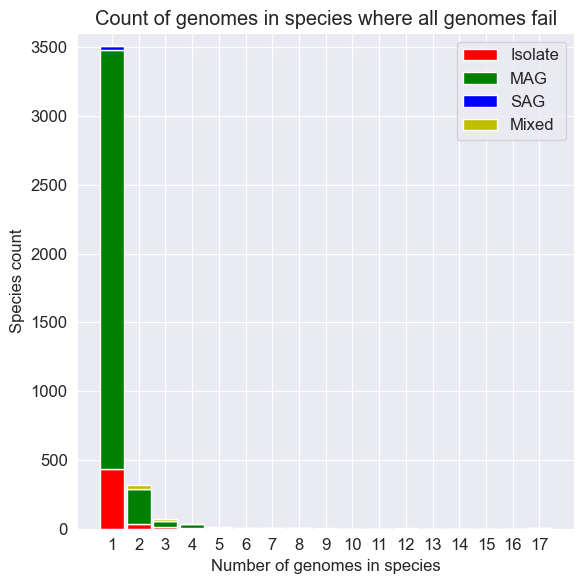

In [16]:

import numpy as np

def make_plot(from_idx, ylim_max):
    df_subset = DF_SP_COUNTS_ISO[DF_SP_COUNTS_ISO['n_gids_in_sp'] == DF_SP_COUNTS_ISO['n_fail_in_sp']]

    x_iso = list()
    x_mag = list()
    x_sag = list()
    x_mix = list()

    max_x = int(df_subset['n_gids_in_sp'].max())

    d_iso, d_mag, d_sag, d_mix = [defaultdict(lambda: 0) for _ in range(4)]
    for row in df_subset.itertuples():
        if row.source == 'Isolate':
            d_iso[row.n_gids_in_sp] += 1
        elif row.source == 'MAG':
            d_mag[row.n_gids_in_sp] += 1
        elif row.source == 'SAG':
            d_sag[row.n_gids_in_sp] += 1
        elif row.source == 'Mixed':
            d_mix[row.n_gids_in_sp] += 1
        else:
            raise Exception('Unknown source')

    print(d_sag)

    x_ticks = list(range(1, max_x+1))
    for i in range(1, max_x + 1):
        x_iso.append(d_iso[i])
        x_mag.append(d_mag[i])
        x_sag.append(d_sag[i])
        x_mix.append(d_mix[i])

    x_iso = np.array(x_iso)
    x_mag = np.array(x_mag)
    x_sag = np.array(x_sag)
    x_mix = np.array(x_mix)

    x_ticks = x_ticks[from_idx:]
    x_iso = x_iso[from_idx:]
    x_mag = x_mag[from_idx:]
    x_sag = x_sag[from_idx:]
    x_mix = x_mix[from_idx:]

    plt.rcParams['svg.fonttype'] = 'none'

    plt.rcParams.update({'font.size': 12})


    fig, ax = plt.subplots(figsize=(6, 6))

    width = 0.9

    plt.bar(x_ticks, x_iso, width, color='r', label='Isolate')
    plt.bar(x_ticks, x_mag, width, color='g', bottom=x_iso, label='MAG')
    plt.bar(x_ticks, x_sag, width, color='b', bottom=x_iso+x_mag, label='SAG')
    plt.bar(x_ticks, x_mix, width, color='y', bottom=x_iso+x_mag+x_sag, label='Mixed')

    plt.xticks(x_ticks)

    ax.set_ylabel('Species count')
    ax.set_xlabel('Number of genomes in species')
    plt.title(f'Count of genomes in species where all genomes fail')
    plt.legend()
    ax.set_ylim((0, ylim_max))
    plt.tight_layout()


    plt.savefig('/tmp/gunc_stats_e.svg')


    return


make_plot(from_idx=0, ylim_max=3600)
# make_plot(from_idx=2, ylim_max=70)

"""


Erythrobacter donghaensis_B, Lactonifactor sp009677585, Pontimonas sp017852615

Erwinia_B gerundensis, Halobacterium hubeiense, Gluconobacter kondonii

Acetobacter tropicalis, Trichormus sp000009705

Nitrosotenuis sp010028495, Pannonibacter indicus

Borreliella valaisiana

HTCC2207 sp018654575

Sulfitobacter mediterraneus_A

Fusobacterium_A sp018205345, MED-G11 sp014239615


"""


In [15]:

import numpy as np

def make_plot():
    df_subset = DF_SP_COUNTS_ISO[DF_SP_COUNTS_ISO['n_gids_in_sp'] == DF_SP_COUNTS_ISO['n_fail_in_sp']]

    x_iso = list()
    x_mag = list()
    x_sag = list()

    max_x = int(df_subset['n_gids_in_iso'].max())

    d_iso, d_mag, d_sag = [defaultdict(lambda: 0) for _ in range(3)]
    for row in df_subset.itertuples():
        if row.source == 'Isolate':
            d_iso[row.n_gids_in_iso] += 1
        elif row.source == 'MAG':
            d_mag[row.n_gids_in_iso] += 1
        elif row.source == 'SAG':
            d_sag[row.n_gids_in_iso] += 1
        else:
            raise Exception('Unknown source')

    x_ticks = list(range(1, max_x+1))
    for i in range(1, max_x + 1):
        x_iso.append(d_iso[i])
        x_mag.append(d_mag[i])
        x_sag.append(d_sag[i])

    x_iso = np.array(x_iso)
    x_mag = np.array(x_mag)
    x_sag = np.array(x_sag)


    plt.rcParams['svg.fonttype'] = 'none'

    plt.rcParams.update({'font.size': 8})


    fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

    width = 0.9

    for cur_ax in (ax, ax2):

        cur_ax.bar(x_ticks, x_iso, width, color='r', label='Isolate')
        cur_ax.bar(x_ticks, x_sag, width, color='b', bottom=x_iso, label='SAG')
        cur_ax.bar(x_ticks, x_mag, width, color='g', bottom=x_iso+x_sag, label='MAG')

    plt.xticks(x_ticks)

    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(1000, 4000)  # outliers only
    ax2.set_ylim(0, 500)  # most of the data

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diago
    # ax.set_ylabel('Number of failed genomes in species')
    # plt.title(f'Species with the largest number of failed genomes totalling {PCT_TARGET}% of all failed genomes')
    plt.legend()
    # ax.set_ylim((0, 4000))
    plt.tight_layout()


    plt.savefig('/tmp/gunc_stats_e.svg')


    return


make_plot()


KeyError: 'n_gids_in_iso'